### 1. Analyze synchronous generator dynamic charactersics in SIMB system using structure-preserving classical model [book](https://courses.physics.illinois.edu/ece576/sp2018/Sauer%20and%20Pai%20book%20-%20Jan%202007.pdf)

Define the swing equation dae model for SMIB

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the mechanical power input for the generator
def P_m(t):
    return 0.85

# Define the electrical power output for linear and nonlinear cases
def P_e_linear(delta, E, V_slack, theta_slack, Xd):
    return (E * V_slack / Xd) * (delta - theta_slack)

def P_e_nonlinear(delta, E, V_slack, theta_slack, Xd):
    return (E * V_slack / Xd) * np.sin(delta - theta_slack)

# Define the system of first-order ODEs with damping
def swing_eq(t, y, E, V_slack, theta_slack, Xd, omega_s, D, linearize=True):
    delta, omega = y
    d_delta_dt = omega - omega_s
    if linearize:
        P_e = P_e_linear
    else:
        P_e = P_e_nonlinear
    d_omega_dt = (omega_s / (2 * H)) * (P_m(t) - P_e(delta, E, V_slack, theta_slack, Xd) - D * (omega - omega_s))
    return [d_delta_dt, d_omega_dt]

# Parameters
E = 1.1           # Generator internal voltage (pu)
V_slack = 1.0     # Infinite bus voltage magnitude (pu)
theta_slack = 0.0 # Infinite bus voltage angle (radians)
Xd = 0.3          # Reactance (pu)
H = 6.5           # Inertia constant (pu)
omega_s = 2 * np.pi * 60  # Synchronous speed (rad/s), assuming 60 Hz grid frequency
D = 0.3*(2*H)/omega_s     # Damping coefficient (pu)

# Time span for the solution
t_span = (0, 50)  # 50 seconds
t_eval = np.linspace(0, 50, 10000)  # Points at which to evaluate the solution

### 2. Compare the results of the linear and nonlinear P_e equation under different initial conditions for solving the ODE

Initial condition:
delta_0 = 0
omega_0 = 377

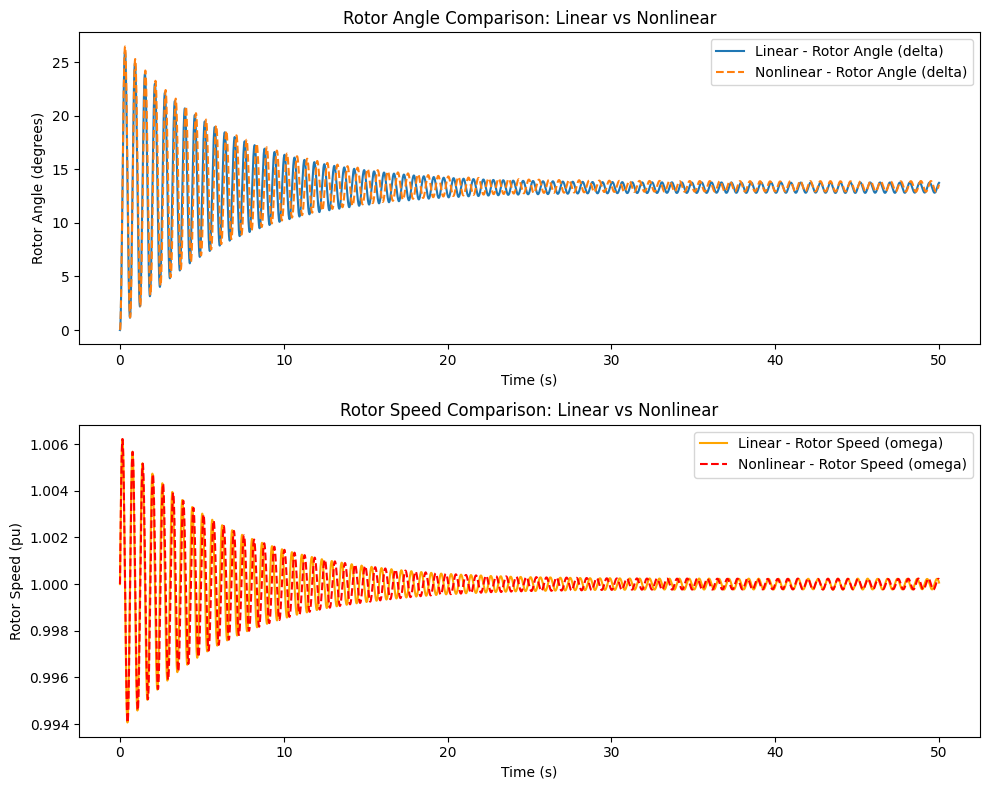

In [2]:
# Initial conditions: delta_0 (initial rotor angle), omega_0 (initial speed deviation)
delta_0 = 0
omega_0 = 1.0 * 2 * np.pi * 60  # Higher initial speed deviation for noticeable dynamics
y0 = [delta_0, omega_0]

# Solve the system for both linear and nonlinear cases
# Linear case
linearize = True
sol_linear = solve_ivp(swing_eq, t_span, y0, args=(E, V_slack, theta_slack, Xd, omega_s, D, linearize), t_eval=t_eval)

# Nonlinear case
linearize = False
sol_nonlinear = solve_ivp(swing_eq, t_span, y0, args=(E, V_slack, theta_slack, Xd, omega_s, D, linearize), t_eval=t_eval)

# Extract the results
delta_linear, omega_linear = sol_linear.y
delta_nonlinear, omega_nonlinear = sol_nonlinear.y

# Convert to degrees and per unit (pu)
delta_linear_deg = delta_linear / np.pi * 180
delta_nonlinear_deg = delta_nonlinear / np.pi * 180
omega_linear_pu = omega_linear / omega_s
omega_nonlinear_pu = omega_nonlinear / omega_s

# Create subplots to compare linear vs nonlinear cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot rotor angle (delta) comparison
ax1.plot(sol_linear.t, delta_linear_deg, label='Linear - Rotor Angle (delta)')
ax1.plot(sol_nonlinear.t, delta_nonlinear_deg, label='Nonlinear - Rotor Angle (delta)', linestyle='dashed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Rotor Angle (degrees)')
ax1.set_title('Rotor Angle Comparison: Linear vs Nonlinear')
ax1.legend()

# Plot rotor speed (omega) comparison
ax2.plot(sol_linear.t, omega_linear_pu, label='Linear - Rotor Speed (omega)', color='orange')
ax2.plot(sol_nonlinear.t, omega_nonlinear_pu, label='Nonlinear - Rotor Speed (omega)', linestyle='dashed', color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Rotor Speed (pu)')
ax2.set_title('Rotor Speed Comparison: Linear vs Nonlinear')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

the ode solver solves both linear and nonliear model well, and shows stable response

Now, with the initial condition:
delta_0 = 0 (the delta does not have much impact on the stability of the ode solver)
omega_0 = 1.2 * 2 * np.pi * 60

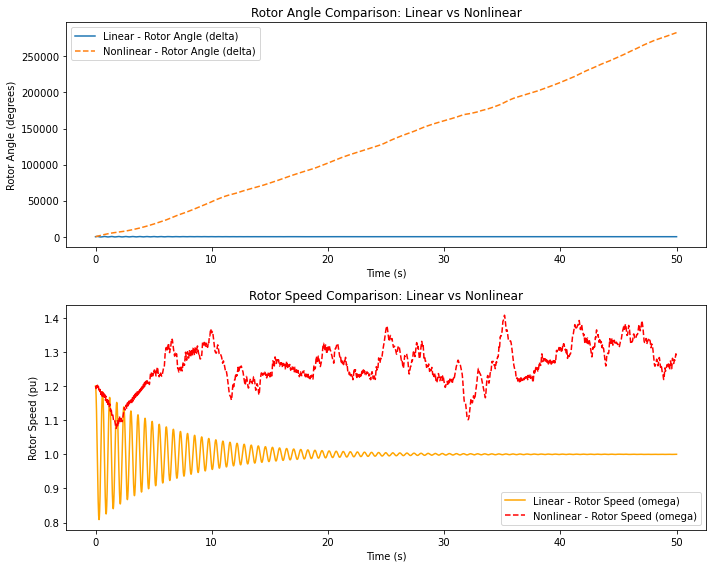

In [3]:
# Initial conditions: delta_0 (initial rotor angle), omega_0 (initial speed deviation)
delta_0 = 0
omega_0 = 1.2 * 2 * np.pi * 60  # Higher initial speed deviation for noticeable dynamics
y0 = [delta_0, omega_0]

# Solve the system for both linear and nonlinear cases
# Linear case
linearize = True
sol_linear = solve_ivp(swing_eq, t_span, y0, args=(E, V_slack, theta_slack, Xd, omega_s, D, linearize), t_eval=t_eval)

# Nonlinear case
linearize = False
sol_nonlinear = solve_ivp(swing_eq, t_span, y0, args=(E, V_slack, theta_slack, Xd, omega_s, D, linearize), t_eval=t_eval)

# Extract the results
delta_linear, omega_linear = sol_linear.y
delta_nonlinear, omega_nonlinear = sol_nonlinear.y

# Convert to degrees and per unit (pu)
delta_linear_deg = delta_linear / np.pi * 180
delta_nonlinear_deg = delta_nonlinear / np.pi * 180
omega_linear_pu = omega_linear / omega_s
omega_nonlinear_pu = omega_nonlinear / omega_s

# Create subplots to compare linear vs nonlinear cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot rotor angle (delta) comparison
ax1.plot(sol_linear.t, delta_linear_deg, label='Linear - Rotor Angle (delta)')
ax1.plot(sol_nonlinear.t, delta_nonlinear_deg, label='Nonlinear - Rotor Angle (delta)', linestyle='dashed')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Rotor Angle (degrees)')
ax1.set_title('Rotor Angle Comparison: Linear vs Nonlinear')
ax1.legend()

# Plot rotor speed (omega) comparison
ax2.plot(sol_linear.t, omega_linear_pu, label='Linear - Rotor Speed (omega)', color='orange')
ax2.plot(sol_nonlinear.t, omega_nonlinear_pu, label='Nonlinear - Rotor Speed (omega)', linestyle='dashed', color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Rotor Speed (pu)')
ax2.set_title('Rotor Speed Comparison: Linear vs Nonlinear')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Now, we see that for linear model, the solver is still stable, but is unstable for nonliear model, thus, we need to have a good initial condition for solving the ode, in our power system case, we need to solve the power flow first, and compute the initial condition for the machine.

### 3. Apply P_m disturbance from 0.85 to 0.25 (step response)

run the simulation from the steady-state, which is solved above

In [4]:
delta_0 = delta_linear_deg[-1] / 180 * np.pi
delta_0

0.24173531106737944

In [5]:
omega_0 = omega_linear[-1]
omega_0

377.0165217710672

to simulate the step response, we now need to make P_m signal to be a time series signal, and we change the P_m from 0.85 to 0.9 pu at 5 second

In [6]:
t_event = 10

def P_m(t):
    if t < t_event:
        return 0.85
    else:
        return 0.25

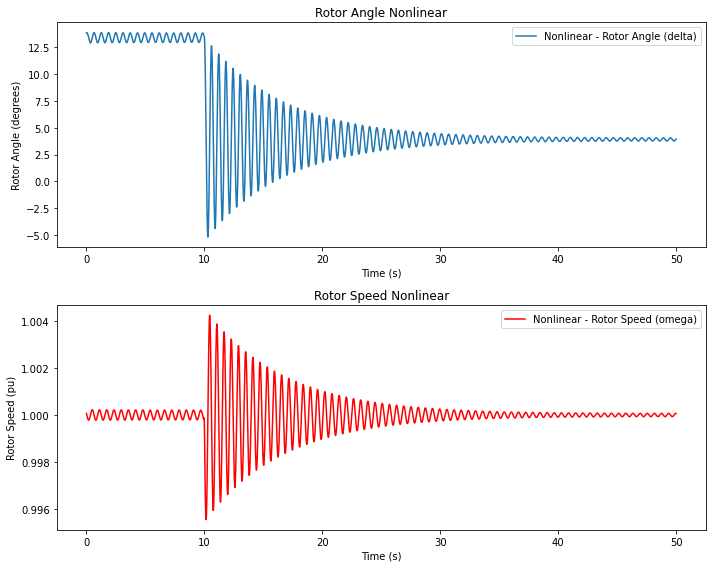

In [7]:
y0 = [delta_0, omega_0]

# Nonlinear case
linearize = False
sol_nonlinear = solve_ivp(swing_eq, t_span, y0, args=(E, V_slack, theta_slack, Xd, omega_s, D, linearize), t_eval=t_eval)

# Extract the results
delta_nonlinear, omega_nonlinear = sol_nonlinear.y

# Convert to degrees and per unit (pu)
delta_nonlinear_deg = delta_nonlinear / np.pi * 180
omega_nonlinear_pu = omega_nonlinear / omega_s

# Create subplots to compare linear vs nonlinear cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot rotor angle (delta) comparison
ax1.plot(sol_nonlinear.t, delta_nonlinear_deg, label='Nonlinear - Rotor Angle (delta)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Rotor Angle (degrees)')
ax1.set_title('Rotor Angle Nonlinear')
ax1.legend()

# Plot rotor speed (omega) comparison
ax2.plot(sol_nonlinear.t, omega_nonlinear_pu, label='Nonlinear - Rotor Speed (omega)', color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Rotor Speed (pu)')
ax2.set_title('Rotor Speed Nonlinear')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4. Small signal stability analysis using sympy

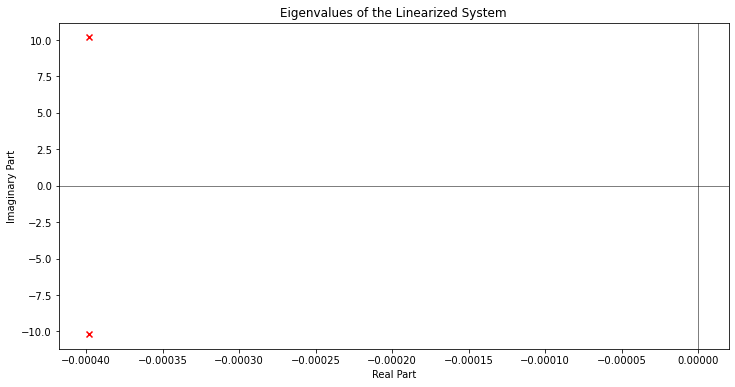

In [8]:
import sympy as sp

# Declare symbols for state variables, parameters, and functions
delta, omega, P_m, E, V_slack, theta_slack, Xd, H, omega_s, D = sp.symbols('delta omega P_m E V_slack theta_slack Xd H omega_s D')

# Define the electrical power P_e(delta) as a nonlinear function
P_e_nonlinear = (E * V_slack / Xd) * sp.sin(delta - theta_slack)

# Define the system of first-order differential equations (swing equation)
d_delta_dt = omega - omega_s  # First equation for rotor angle change (d(delta)/dt)
d_omega_dt = (omega_s / (2 * H)) * (P_m - P_e_nonlinear) - (D / (2 * H)) * (omega - omega_s)  # Second equation for speed deviation (d(omega)/dt)

# Define the state vector and the system of equations
state_vector = sp.Matrix([delta, omega])
state_vector_prime = sp.Matrix([d_delta_dt, d_omega_dt])

# Perform small signal stability analysis by linearizing around the equilibrium point (delta_0, omega_0)
# Here, we linearize around the steady-state: delta = delta_0, omega = omega_s

# First, compute the Jacobian matrix (partial derivatives of the equations with respect to the state variables)
Jacobian = state_vector_prime.jacobian(state_vector)

# Define the equilibrium point (operating point)
delta_0, omega_0 = sp.symbols('delta_0 omega_0')

# Substitute the equilibrium point into the Jacobian matrix
Jacobian_at_eq = Jacobian.subs({delta: delta_0, omega: omega_0})

# Display the Jacobian matrix at the operating point
A = sp.simplify(Jacobian_at_eq)


import matplotlib.pyplot as plt
import numpy as np

param_values = {
    E: 1.1,              # Internal voltage (pu)
    V_slack: 1.0,        # Infinite bus voltage magnitude (pu)
    theta_slack: 0.0,    # Infinite bus voltage angle (radians)
    Xd: 0.3,             # Reactance (pu)
    H: 6.5,              # Inertia constant (pu)
    omega_s: 2 * sp.pi * 60,  # Synchronous speed (rad/s), assuming 60 Hz grid
    D: 0.3 * (2 * 6.5) / (2 * sp.pi * 60),  # Damping coefficient
    P_m: 0.85,           # Mechanical power (pu)
    delta_0: sp.asin(0.85 * 0.3 / (1.1 * 1.0))  # Steady-state rotor angle delta_0 (from power balance)
}

eigenvalues_numeric = A.subs(param_values).eigenvals()

# Extract real and imaginary parts
real_parts = [eigenvalue.as_real_imag()[0] for eigenvalue, multiplicity in eigenvalues_numeric.items()]
imaginary_parts = [eigenvalue.as_real_imag()[1] for eigenvalue, multiplicity in eigenvalues_numeric.items()]

# Plot the eigenvalues on the complex plane
plt.figure(figsize=(12, 6))
plt.scatter(real_parts, imaginary_parts, color='red', marker='x')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Eigenvalues of the Linearized System')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.show()